<a href="https://colab.research.google.com/github/yperdana/predicting-used-car-price-based-on-kilometer/blob/master/Predicting_Used_Car_Price_Based_on_PowerPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is part of training in Bangkit Academy.

We use data from Kaggle - "Used cars database".

We try to predict 'Price' based on 'PowerPS'.

Our Filtering Data:
1. We only use SUV type 
2. We try to only use Mercedes-Bens Cars

We use SUV and Mercedes-Bens because that the most top selling car, and with same brand, easier to predict.

We use code experiment from Machine Learning Crash Course by Google.

Our Team Members:
1. Yohanes
2. Eko
3. Yogic

Here the step by step and code bellow

In [0]:
#Run on TensorFlow 2.x
%tensorflow_version 2.x

#Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [137]:
# Import the dataset.
#training_df = pd.read_csv(filepath_or_buffer="https://drive.google.com/file/d/1RbuaM4QrjRrSIXvvsUdGanY7TpHXDVYj/view?usp=sharing")
training_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTkbsvshuhRMeir109MvC_3QvbpJwBJkMN9R0KeCWehSzu74CoU29Nlf11klUkdHWfSoH81HHkbxtru/pub?output=csv')


# Print the first rows of the pandas DataFrame.
training_df.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/19/16 21:25,Mercedes_Benz_G_350___NP:_110.000__neuwertig__...,privat,Angebot,82800,control,suv,2015,automatik,211,g_klasse,20000,1,diesel,mercedes_benz,nein,3/19/16 0:00,0,61348,3/25/16 9:18
1,3/14/16 11:57,Mercedes_Benz_G_350_BlueTEC_7G_TRONIC_Edition_...,privat,Angebot,78900,test,suv,2015,automatik,211,g_klasse,10000,7,diesel,mercedes_benz,nein,3/14/16 0:00,0,57462,4/5/16 11:50
2,4/5/16 12:45,Mercedes_Benz_GLE_Coupe_350_BlueTEC_4MATIC_9G_...,privat,Angebot,73000,test,suv,2015,automatik,258,g_klasse,20000,10,diesel,mercedes_benz,nein,4/5/16 00:00,0,12683,4/5/16 12:45
3,3/21/16 9:36,Mercedes_Benz_GLE_350_d_4Matic_9G_TRONIC_AMG_Line,privat,Angebot,69999,control,suv,2016,automatik,258,andere,5000,1,diesel,mercedes_benz,nein,3/21/16 0:00,0,10715,3/31/16 11:16
4,3/21/16 20:45,Mercedes_Benz_G_350_BlueTEC_Lang,privat,Angebot,68500,control,suv,2014,automatik,211,andere,50000,6,diesel,mercedes_benz,nein,3/21/16 0:00,0,45711,3/21/16 20:45


In [138]:
# Get statistics on the dataset.
training_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,61.0,61.0,61.0,61.0,61.0,61.0,61.0
mean,42785.2,2014.6,185.8,21557.4,5.7,0.0,57292.1
std,15249.5,0.7,41.1,14875.6,2.9,0.0,22990.0
min,18300.0,2014.0,109.0,5000.0,1.0,0.0,10715.0
25%,31600.0,2014.0,156.0,10000.0,3.0,0.0,42855.0
50%,39200.0,2014.0,170.0,20000.0,5.0,0.0,56581.0
75%,53650.0,2015.0,211.0,30000.0,7.0,0.0,74360.0
max,82800.0,2016.0,258.0,70000.0,12.0,0.0,94239.0


In [139]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [140]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label, largest_value):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=60)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = largest_value
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Train on 61 samples
Epoch 1/100
61/61 [==============================] - 0s 4ms/sample - loss: 3357431803.8033 - root_mean_squared_error: 57943.3516
Epoch 2/100
61/61 [==============================] - 0s 86us/sample - loss: 3108758305.5738 - root_mean_squared_error: 55756.2383
Epoch 3/100
61/61 [==============================] - 0s 120us/sample - loss: 2941668016.2623 - root_mean_squared_error: 54237.1445
Epoch 4/100
61/61 [==============================] - 0s 116us/sample - loss: 2803747076.1967 - root_mean_squared_error: 52950.4219
Epoch 5/100
61/61 [==============================] - 0s 110us/sample - loss: 2682041629.3770 - root_mean_squared_error: 51788.4297
Epoch 6/100
61/61 [==============================] - 0s 129us/sample - loss: 2572495435.5410 - root_mean_squared_error: 50719.7734
Epoch 7/100
61/61 [==============================] - 0s 102us/sample - loss: 2470502626.6230 - root_mean_squared_error: 49704.1523
Epoch 8/100
61/61 [==============================] - 0s 121us/samp

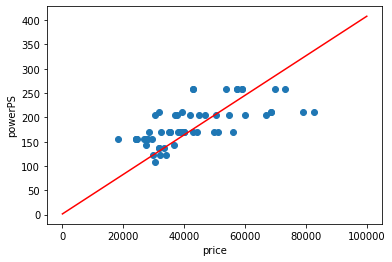

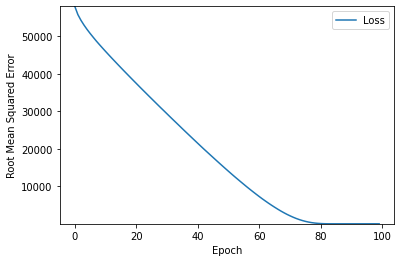

In [187]:
# Testing Corelation between households and total_rooms.

# Selecting label and feature
my_feature = "price"
my_label= "powerPS" 

# Assign values to these three hyperparameters.
learning_rate = 0.01
epochs = 100
batch_size =  60

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label,100000)
plot_the_loss_curve(epochs, rmse)

Conclusion:
1. This is our first experiment using real data from kaggle.
2. We saw that PowerPS have corellation with Price.

Task Further:
1. Examine data to find another Relationship
2. Try to use larger data
3. Split into training dataset and test dataset
4. Do Validation Test